In [116]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score, recall_score

raws = pd.read_csv('adults.csv')
pred = raw.iloc[:,14:15]
raws.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [117]:
insr2 = raws
col = insr2.select_dtypes('object').columns
insr2[col] = insr2[col].astype('category')

col = insr2.select_dtypes('category').columns
insr2[col] = insr2[col].apply(lambda x : x.cat.codes)

In [118]:
insr2.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


In [106]:
raws.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


In [119]:
train = insr2.iloc[:,9:13]
train['relationship'] = insr2.iloc[:,7:8]
train['education-num'] = insr2.iloc[:,4:5]
train['marital-status'] = insr2.iloc[:,5:6]
train['age'] = insr2['age']
train.head()

,sex,capital-gain,capital-loss,hours-per-week,relationship,education-num,marital-status,age
0,1,2174,0,40,1,13,4,39
1,1,0,0,13,0,13,2,50
2,1,0,0,40,1,9,0,38
3,1,0,0,40,0,7,2,53
4,0,0,0,40,5,13,2,28


In [120]:
train, test, train_labels, test_labels = train_test_split(train, pred,test_size=0.2)
tre = DecisionTreeClassifier(criterion='entropy')
model = tre.fit(train, train_labels)

In [132]:
preds = model.predict(test)
print(preds)

[' <=50K' ' <=50K' ' <=50K' ... ' <=50K' ' <=50K' ' <=50K']


In [133]:
print ('Accuracy score is=', accuracy_score(test_labels, preds)*100)

Accuracy score is= 82.8036235221864


In [142]:
def plot_confusion_matrix(cm, classes,
 normalize=False,
title='Confusion matrix',
cmap=plot.cm.Blues):

 if normalize:
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
  print ("Normalized confusion matrix")
 else:
  print('Confusion matrix, without normalization')
  print(cm)
 
 plot.imshow(cm, interpolation='nearest', cmap=cmap)
 plot.title(title)
 plot.colorbar()
 tick_marks = np.arange(len(classes))
 plot.xticks(tick_marks, classes, rotation=45)
 plot.yticks(tick_marks, classes)
 fmt = '.2f' if normalize else 'd'
 thresh = cm.max() / 2.
 for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, format(cm[i, j], fmt),
   horizontalalignment="center",
    color="white" if cm[i, j] > thresh else "black")
 plot.tight_layout()
 plot.ylabel('True label')
 plot.xlabel('Predicted label')

In [149]:
!pip install itertools

  Could not find a version that satisfies the requirement itertools (from versions: )
No matching distribution found for itertools


Confusion matrix, without normalization
[[4513  447]
 [ 673  880]]


NameError: name 'itertools' is not defined

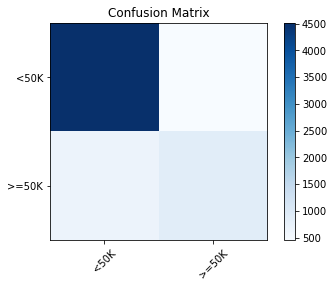

In [146]:
conf_mat = confusion_matrix(test_labels, preds)
labels_name = ['<50K','>=50K']
plot.figure()
plot_confusion_matrix(conf_mat, classes=labels_name , normalize=False, title='Confusion Matrix')
plot.show()

In [157]:
average_precision = precision_score(test_labels, preds, average='macro')
recall = recall_score(test_labels, preds, average='weighted')

print('precision score: {0:0.2f}'.format(
      average_precision))
print('recall score: {0:0.2f}'.format(
      average_precision))

precision score: 0.77
recall score: 0.77
